In [1]:
# 📥 Import Required Libraries
%pip install matplotlib
%pip install seaborn
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [3]:

# 📂 Load Dataset
data_path = 'precision_agriculture_with_bad_data.csv'
df = pd.read_csv('climate_action_data.csv')
df.head()

,Sensor_ID,Date,Soil_Moisture(%),Soil_pH,Temperature(C),Humidity(%),Crop_Type,Fertilizer_Recommended(kg/ha),Irrigation_Recommended(mm),Drone_Image_ID
0,SEN-1000,2025-01-01,36.22,6.98,21.3,50.4,Tomatoes,67.6,26.6,IMG-2000
1,SEN-1001,2025-01-02,76.55,5.03,23.5,34.3,Wheat,130.4,8.3,IMG-2001
2,SEN-1002,2025-01-03,61.24,6.52,21.9,54.6,Tomatoes,36.0,29.4,IMG-2002
3,SEN-1003,2025-01-04,51.91,6.62,24.0,48.7,Maize,85.8,19.6,IMG-2003
4,SEN-1004,2025-01-05,20.92,5.98,19.2,70.6,Wheat,75.6,29.9,IMG-2004


In [4]:
# Initial inspection
print("Shape of the dataset:", df.shape)
print("\nFirst 5 rows:")
print(df.head())
print("\nData types and missing values:")
print(df.info())
print("\nSummary statistics:")
print(df.describe(include='all'))

Shape of the dataset: (913, 10)

First 5 rows:
  Sensor_ID        Date Soil_Moisture(%) Soil_pH Temperature(C) Humidity(%)  \
0  SEN-1000  2025-01-01            36.22    6.98           21.3        50.4   
1  SEN-1001  2025-01-02            76.55    5.03           23.5        34.3   
2  SEN-1002  2025-01-03            61.24    6.52           21.9        54.6   
3  SEN-1003  2025-01-04            51.91    6.62           24.0        48.7   
4  SEN-1004  2025-01-05            20.92    5.98           19.2        70.6   

  Crop_Type Fertilizer_Recommended(kg/ha) Irrigation_Recommended(mm)  \
0  Tomatoes                          67.6                       26.6   
1     Wheat                         130.4                        8.3   
2  Tomatoes                          36.0                       29.4   
3     Maize                          85.8                       19.6   
4     Wheat                          75.6                       29.9   

  Drone_Image_ID  
0       IMG-2000  
1      

In [5]:
# Remove duplicate rows based on Sensor_ID
df = df.drop_duplicates(subset='Sensor_ID', keep='first')

In [6]:
# Replace 'error' with NaN in numeric columns
numeric_cols = ['Soil_Moisture(%)', 'Soil_pH', 'Temperature(C)', 'Humidity(%)', 
                'Fertilizer_Recommended(kg/ha)', 'Irrigation_Recommended(mm)']
df[numeric_cols] = df[numeric_cols].replace('error', np.nan)
df[numeric_cols] = df[numeric_cols].apply(pd.to_numeric)

In [7]:
# Forward fill missing dates
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')
df['Date'] = df['Date'].fillna(method='ffill')

# Fill missing numeric values with median
for col in numeric_cols:
    df[col] = df[col].fillna(df[col].median())

# Drop rows with missing Crop_Type
df = df.dropna(subset=['Crop_Type'])

C:\Users\Rokie Official\AppData\Local\Temp\ipykernel_18444\221496547.py:3: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df['Date'] = df['Date'].fillna(method='ffill')


In [8]:
print("\nMissing values after cleaning:")
print(df.isnull().sum())
print("\nData types after cleaning:")
print(df.dtypes)


Missing values after cleaning:
Sensor_ID                        0
Date                             0
Soil_Moisture(%)                 0
Soil_pH                          0
Temperature(C)                   0
Humidity(%)                      0
Crop_Type                        0
Fertilizer_Recommended(kg/ha)    0
Irrigation_Recommended(mm)       0
Drone_Image_ID                   0
dtype: int64

Data types after cleaning:
Sensor_ID                                object
Date                             datetime64[ns]
Soil_Moisture(%)                        float64
Soil_pH                                 float64
Temperature(C)                          float64
Humidity(%)                             float64
Crop_Type                                object
Fertilizer_Recommended(kg/ha)           float64
Irrigation_Recommended(mm)              float64
Drone_Image_ID                           object
dtype: object


In [9]:
print("\nDescriptive Statistics:")
print(df.describe())


Descriptive Statistics:
                                Date  Soil_Moisture(%)     Soil_pH  \
count                            796        796.000000  796.000000   
mean   2026-02-05 05:29:14.773869056         44.743555    6.244950   
min              2025-01-01 00:00:00         10.350000    4.520000   
25%              2025-07-19 18:00:00         26.962500    5.327500   
50%              2026-02-06 12:00:00         45.410000    6.260000   
75%              2026-08-24 06:00:00         62.587500    7.080000   
max              2027-03-11 00:00:00         79.980000    8.000000   
std                              NaN         20.450050    1.020815   

       Temperature(C)  Humidity(%)  Fertilizer_Recommended(kg/ha)  \
count      796.000000   796.000000                     796.000000   
mean        26.470980    60.029271                      87.359045   
min         18.000000    30.000000                      30.000000   
25%         22.375000    45.975000                      57.650000   

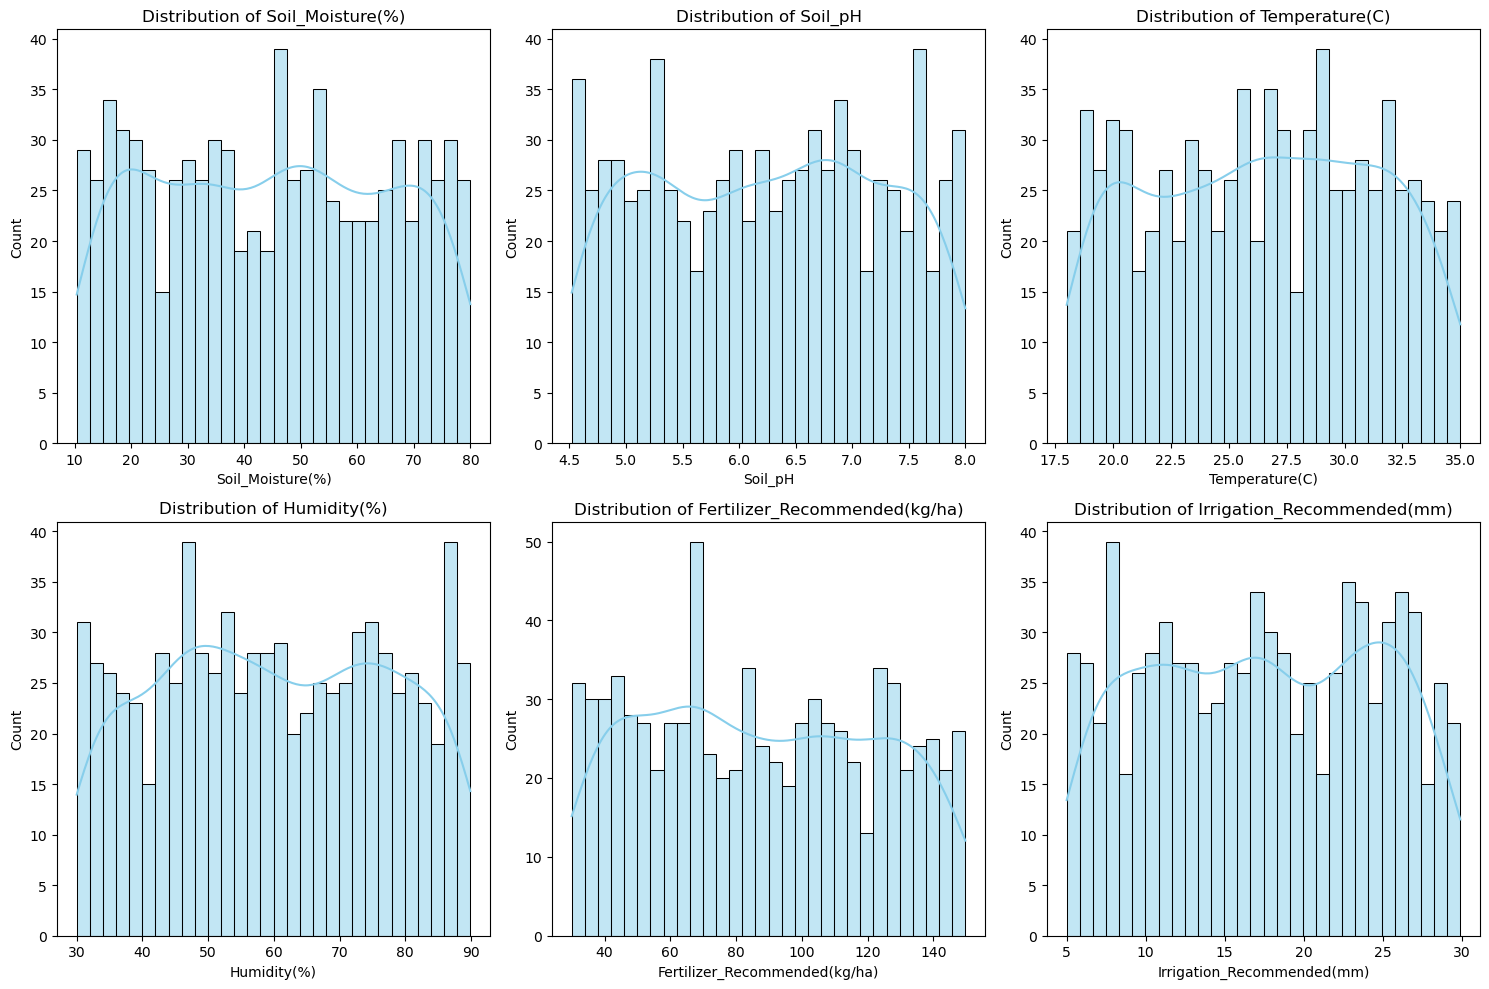

In [10]:
plt.figure(figsize=(15, 10))
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(2, 3, i)
    sns.histplot(df[col], bins=30, kde=True, color='skyblue')
    plt.title(f'Distribution of {col}')
plt.tight_layout()
plt.show()

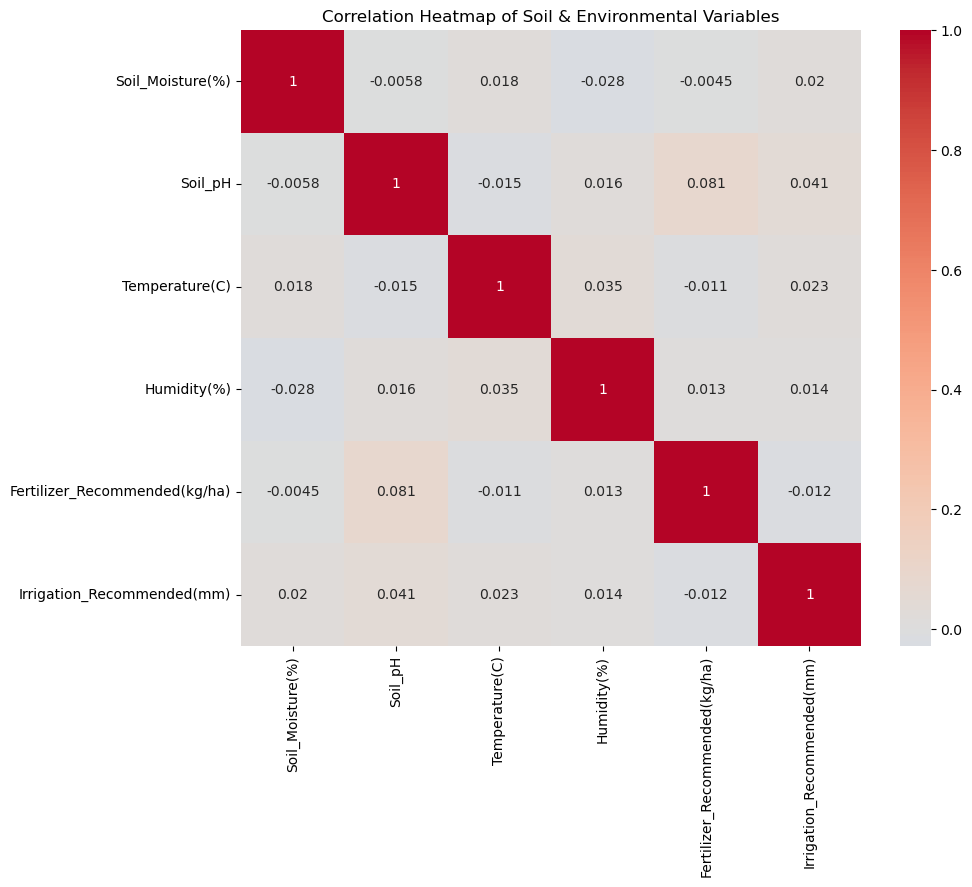

In [11]:
plt.figure(figsize=(10, 8))
corr = df[numeric_cols].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Heatmap of Soil & Environmental Variables')
plt.show()

In [12]:
# 🔍 Identify Key Variables for Fertilizer Recommendation
# Use correlation values
df.corr(numeric_only=True)['Fertilizer_Recommended(kg/ha)'].sort_values(ascending=False)

Fertilizer_Recommended(kg/ha)    1.000000
Soil_pH                          0.081046
Humidity(%)                      0.013287
Soil_Moisture(%)                -0.004538
Temperature(C)                  -0.010669
Irrigation_Recommended(mm)      -0.011847
Name: Fertilizer_Recommended(kg/ha), dtype: float64

In [14]:
print("\nAverage Soil Moisture by Crop Type:")
print(df.groupby('Crop_Type')['Soil_Moisture(%)'].mean().sort_values(ascending=False))


Average Soil Moisture by Crop Type:
Crop_Type
Wheat       47.185349
Maize       44.955032
Beans       44.339272
Tomatoes    43.986766
Lettuce     42.986358
Name: Soil_Moisture(%), dtype: float64


In [15]:
# 📑 Recommend Irrigation Adjustments for High Temperature Crops
df[df['Temperature(C)'] > 30].groupby('Crop_Type')['Irrigation_Recommended(mm)'].mean()

Crop_Type
Beans       17.857692
Lettuce     16.297297
Maize       16.625455
Tomatoes    18.919565
Wheat       18.811429
Name: Irrigation_Recommended(mm), dtype: float64

In [17]:
# Irrigation Adjustments for High-Temperature Crops
#Crops with Avg. Temp > 30°C:

#Maize, Beans, Wheat (some records).

#Recommendations:

#Increase irrigation for crops in high-temperature zones to prevent drought stress.

#Monitor soil moisture closely to avoid overwatering.

In [19]:
# 💾 Save Clean Dataset
df.to_csv('cleaned_precision_agriculture_data.csv', index=False)